In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


In [6]:
df = pd.read_csv('rainfall.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
#df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df
print('Shape: ',df.shape)
df.head()

Shape:  (3625, 1)


,Rain
Date,
2011-01-01,3231
2011-01-02,3231
2011-01-03,3231
2011-01-04,3231
2011-01-05,3231


In [7]:
df['Rain']

Date
2011-01-01    3231
2011-01-02    3231
2011-01-03    3231
2011-01-04    3231
2011-01-05    3231
              ... 
2020-11-29    2814
2020-11-30    2848
2020-12-01    2902
2020-12-02    2873
2020-12-03    2867
Name: Rain, Length: 3625, dtype: int64

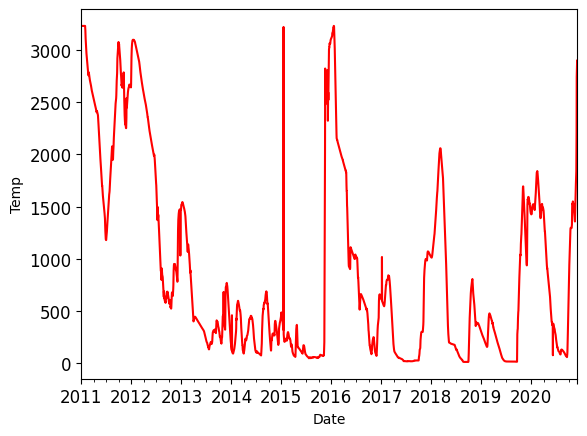

In [8]:
df['Rain'].plot(fontsize=12, color='r',ylabel='Temp')
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest=adfuller(dataset,autolag='AIC')
    print('1. ADF: ',dftest[0])
    print('2. p-value: ',dftest[1])
    print('3. No. of lags: ',dftest[2])
    print('4. No. of observations used for ADF regression and critical values calculation: ',dftest[3])
    print('5. Critical Values: ')
    for key, val in dftest[4].items():
        print('\t',key,': ',val)

In [10]:
ad_test(df['Rain'])

1. ADF:  -2.9005704800948
2. p-value:  0.04528169860633587
3. No. of lags:  8
4. No. of observations used for ADF regression and critical values calculation:  3616
5. Critical Values: 
	 1% :  -3.432159720193857
	 5% :  -2.862339633287972
	 10% :  -2.56719565730786


In [11]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings('ignore')

In [12]:
stepwise_fit=auto_arima(df['Rain'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=41262.712, Time=1.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=41852.754, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=41423.845, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=41469.301, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=41850.760, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=41260.859, Time=0.76 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=41385.002, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=41422.573, Time=0.17 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=41262.691, Time=3.56 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=41328.348, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=41415.485, Time=0.63 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=41264.802, Time=1.31 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=41258.860, Time=0.55 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=41383.013, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3625
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -20625.430
Date:                Sun, 14 Apr 2024   AIC                          41258.860
Time:                        13:34:32   BIC                          41283.642
Sample:                    01-01-2011   HQIC                         41267.689
                         - 12-03-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8049      0.013     61.353      0.000       0.779       0.831
ma.L1         -1.1844      0.013    -90.645      0.000      -1.210      -1.159
ma.L2          0.4143      0.005     90.533      0.000       0.405       0.423
sigma2      5139.3728      6.175    832.293      0.000    5127.270    5151.475
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):         117018430.03
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            13.85
Prob(H) (two-sided):                  0.28   Kurtosis:                       882.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
from statsmodels.tsa.arima_model import ARIMA

In [14]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,train.shape)

(3625, 1)
(3595, 1) (3595, 1)


In [20]:
model=ARIMA(train['Rain'],order=(1,1,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Rain   No. Observations:                 3595
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -20412.509
Date:                Sun, 14 Apr 2024   AIC                          40833.018
Time:                        13:35:57   BIC                          40857.767
Sample:                    01-01-2011   HQIC                         40841.839
                         - 11-03-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7886      0.013     61.119      0.000       0.763       0.814
ma.L1         -1.1922      0.013    -92.839      0.000      -1.217      -1.167
ma.L2          0.4296      0.005     89.916      0.000       0.420       0.439
sigma2      5019.5430      5.899    850.880      0.000    5007.981    5031.105
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         124758982.99
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                            14.80
Prob(H) (two-sided):                  0.00   Kurtosis:                       915.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
print(pred)

Date
2020-11-04    1532.550124
2020-11-05    1530.205984
2020-11-06    1528.357503
2020-11-07    1526.899878
2020-11-08    1525.750462
2020-11-09    1524.844086
2020-11-10    1524.129360
2020-11-11    1523.565760
2020-11-12    1523.121332
2020-11-13    1522.770876
2020-11-14    1522.494523
2020-11-15    1522.276604
2020-11-16    1522.104763
2020-11-17    1521.969257
2020-11-18    1521.862403
2020-11-19    1521.778144
2020-11-20    1521.711700
2020-11-21    1521.659306
2020-11-22    1521.617991
2020-11-23    1521.585411
2020-11-24    1521.559720
2020-11-25    1521.539462
2020-11-26    1521.523487
2020-11-27    1521.510890
2020-11-28    1521.500956
2020-11-29    1521.493123
2020-11-30    1521.486946
2020-12-01    1521.482076
2020-12-02    1521.478235
2020-12-03    1521.475206
Name: predicted_mean, dtype: float64


<Axes: xlabel='Date'>

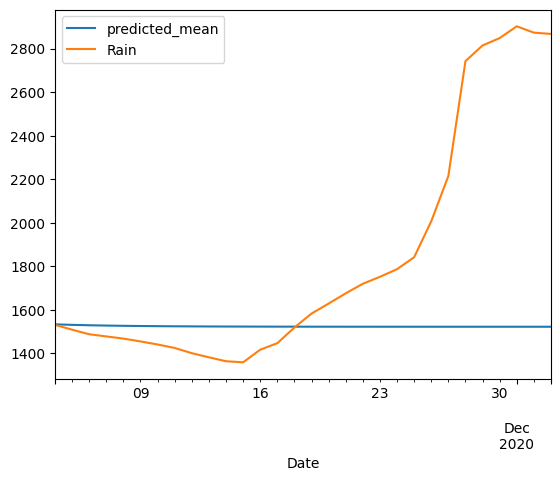

In [22]:
pred.plot(legend=True)
test['Rain'].plot(legend=True)

In [23]:
test['Rain'].mean()

1830.5666666666666

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Rain']))
print(rmse)

622.1968119017469


In [25]:
model2=ARIMA(df['Rain'],order=(1,1,2))
model2=model2.fit()
df.tail()

,Rain
Date,
2020-11-29,2814
2020-11-30,2848
2020-12-01,2902
2020-12-02,2873
2020-12-03,2867


In [26]:
index_future_dates=pd.date_range(start='2020-12-03',end='2020-12-31')
pred=model2.predict(start=len(df),end=len(df)+28,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
print(pred)

2020-12-03    2956.024610
2020-12-04    2974.342936
2020-12-05    2989.086759
2020-12-06    3000.953581
2020-12-07    3010.504798
2020-12-08    3018.192261
2020-12-09    3024.379649
2020-12-10    3029.359676
2020-12-11    3033.367937
2020-12-12    3036.594055
2020-12-13    3039.190652
2020-12-14    3041.280569
2020-12-15    3042.962674
2020-12-16    3044.316546
2020-12-17    3045.406233
2020-12-18    3046.283287
2020-12-19    3046.989199
2020-12-20    3047.557364
2020-12-21    3048.014662
2020-12-22    3048.382726
2020-12-23    3048.678969
2020-12-24    3048.917405
2020-12-25    3049.109314
2020-12-26    3049.263776
2020-12-27    3049.388097
2020-12-28    3049.488159
2020-12-29    3049.568696
2020-12-30    3049.633517
2020-12-31    3049.685690
Freq: D, Name: ARIMA Predictions, dtype: float64


<Axes: xlabel='Date', ylabel='Close'>

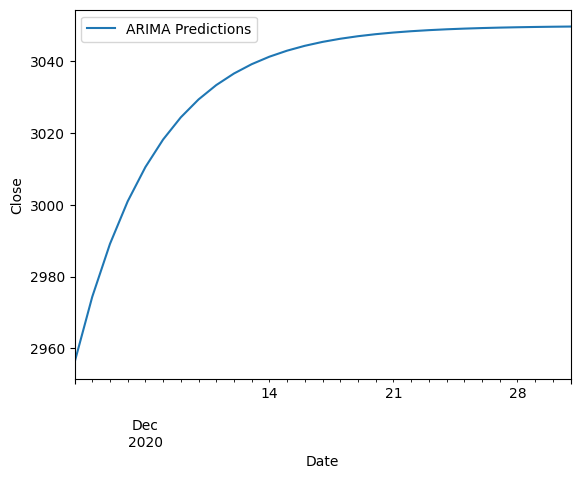

In [27]:
pred.plot(legend=True,xlabel='Date',ylabel='Close')